<a href="https://colab.research.google.com/github/Ditipriya5678/Coronavirus-genome-sequence/blob/main/Repeat_Regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.8 MB/s eta 0:00:00


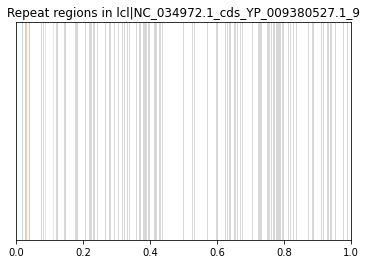

In [ ]:
from Bio import SeqIO
import matplotlib.pyplot as plt

# Load the genome sequences in FASTA format
records = SeqIO.parse("coronavirus.fasta", "fasta")

# Loop over the sequences and process each one
for record in records:
    sequence = str(record.seq)
    # Add your code here to process each sequence

# Find repeat regions using a simple algorithm that looks for consecutive identical sequences
repeats = []
current_repeat = {'start': None, 'end': None}
for i in range(1, len(sequence)):
    if sequence[i] == sequence[i-1]:
        if current_repeat['start'] is None:
            current_repeat['start'] = i-1
        current_repeat['end'] = i
    else:
        if current_repeat['start'] is not None:
            repeats.append(current_repeat)
            current_repeat = {'start': None, 'end': None}
if current_repeat['start'] is not None:
    repeats.append(current_repeat)

# Visualize the repeat regions as horizontal lines with different colors
fig, ax = plt.subplots()
for i, repeat in enumerate(repeats):
    color = plt.cm.Set2(i)
    ax.axhspan(0, 1, xmin=repeat['start']/len(sequence), xmax=repeat['end']/len(sequence),
               facecolor=color, alpha=0.5)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_yticks([])
ax.set_title(f"Repeat regions in {record.id}")
plt.show()

